In [176]:
# Data preprocessing most critical task. 95% of time is spent on cleaning
# data. Data preprocessing related to multivariate data - both nuerical
# and non numeric categorical.
# 1) Check for null columns or variables. info() - Delete those varibles

# 2) Check for Single Value Columns or Variables - Whole column has only
# one value like 1's or 0's. Delete those variables

# 3) Missing Value Treatment - Missing values occur due to errors in data
# collection or due to misrepresentation of data. Missing values must be
# imputed or treated before running the algorithm.
# a) If the column or variable has more than 70% missing values and if
# it is not a significant variable - Drop or Delete variable

# b) If the column or variable has more than 70% missing values and if
# it is a significant variable, 
#   Numeric Variable - impute with numeric code like 9999,1111,2222
#   Non Numeric Variable - impute with word "missing" or "NotAvailable"

# c) If the column or variable has less than 70% missing values 
# imputation can be done either manually or using Algorithm
# Manual Imputation  - mean, median or mode of the column or variable
# Numeric - Impute with mean or median based on whether mean is distorted
# Categrocial - Impute with mode or most_frequent

# Algorithm based Imputation - Algorithms consider the impact of other
# variables on the missing value and impute accordingly. 
# 1)Multivariate Imputation using Chained Equations (MICE) - used for
# imputing both numeric and non numeric categorical variables
# 2)KNNImputer uses K Nearest Neighbors Algorithm which is a distance
# based algorithm. Works only with Numerical Data
# 3) Probabilistic PCA uses Principal Component Analysis (PCA) Algorithm
# for imputation.

# Deletion of Missing values can be done only if there is large data and
# missing values are less than 5% of data. Large data means more than 
# 50000 observations.

# 4) Data Transformation - Transforming Data
# Dependent Variable(y) - Variable that is being predicted 
# Positive Skewness - Logarthmic Transformation or Square Root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation

# Independent Variables (X's) - Variables that are being used in the model
# to predict dependent variable (y). Scaling must be implemented.
# 1) Standard Scaler or Z-Score = (x-mean)/stddeviation. Standard Scaler
# scales data in both positive and negative values within a range.
# preferred scaler when data is in multiple mathematical units like tens,
# hundreds, thousands, discrete integer  and lakhs
# 2) Nomalization or Min Max Scaler = (X-Xmin)/(Xmax-Xmin). Scales data
# in the range of 0 to 1 and no negative values. Most used in Image
# processing and Neural Networks
# 3) Robust Scaler = (X-Q2)/(Q3-Q1) uses quartiles to scale data and is
# used when independent variables have extreme outliers.

# 5) Dummy Variable Encoding - Assigning Numerical Identifiers to levels/
# Groups/Classes in Categorical Variables.
# a) LabelEncoder - Encodes categroical variable levels from 0 to n levels
# based on Alphabetical order in the same column
# b) pandas.get_dummies() - Creates as many columns equivalent to levels/
# Groups in Categorical variable and uses binary encoding (yes-1 & no-0)
# for each level.
# Gender   - M, F, F, F, M, M, M , F
# Labelncoder
# Gender   - 1, 0, 0, 0, 1, 1, 1, 0
# pd.get_dummies()
# Gender_M - 1, 0, 0, 0, 1, 1, 1, 0
# Gender_F - 0, 1, 1, 1, 0, 0, 0, 1

# Dummy Variable encoding must be done on Object/text Data, Numeric
# Categorical Variables like Ratings, Quarter, Month, etc.

# 6) Working with dates - Dates must be converted into date format using
# pd.to_datetime() function. Extract variables from date like weekday,
# month, season, quarter, year, etc. Timedelta which is difference in
# time.

# 7) Extracting information from Alpha numeric identifiers

# 8) Create new variables from existing variables.

# 9) Correcting duplicate levels in categorical data

# 10) working with different datatypes

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Hackathon/BigMart Sales'

/Users/rajeshprabhakarkaila/Desktop/Hackathon/BigMart Sales


In [179]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [180]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [181]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

# Hackathons, Jobathons & Competitions - 3 files will be provided
# Train File is complete data including dependent variable(y) and this
# data must be used for buiding or training a model.
# Test File will not have dependent variable(y) and needs to be predicted
# using the model built on train data.
# Sample Submission File is where predictions are copied and submitted
# to competition site for evaluation

(8523, 12)
(5681, 11)


In [182]:
bigmarttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [183]:
bigmarttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [184]:
# For preprocessing of data, concatenation of both train and test files
# must be done.
# For Concatenation the number of columns or variables must be same.
# For purpose of concatenation, temporarily add dependent variable to
# test data and fill column with word 'test'

In [185]:
bigmarttest['Item_Outlet_Sales']='test'

In [186]:
# Concatenation of both dataframes for preprocessing
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)

# axis=0 is Row wise Concatenation
# axis=1 is Column wise Concatenation

In [187]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [188]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

# np.number selects both int64 and float64

In [189]:
print(numcols.shape)
print(objcols.shape)

(14204, 4)
(14204, 8)


In [190]:
numcols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [191]:
# impute Item_Weight
numcols.Item_Weight=numcols.Item_Weight.fillna(
    numcols.Item_Weight.mean())

In [192]:
# impute Outlet_Size
objcols.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [193]:
# impute with word "Missing"
objcols.Outlet_Size=objcols.Outlet_Size.fillna("Missing")

In [194]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [195]:
# Create a new variable called Item_Code based on Item_Identifier
objcols['Item_Code']=objcols.Item_Identifier.str[0:2]

In [196]:
objcols.Item_Code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [197]:
objcols.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [198]:
objcols.Item_Fat_Content=objcols.Item_Fat_Content.replace(['LF','low fat'],
                                                         'Low Fat')

In [199]:
objcols.Item_Fat_Content=objcols.Item_Fat_Content.replace('reg','Regular')

In [200]:
for col in objcols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium     4655
Missing    4016
Small      3980
Hig

In [201]:
# Create a new variable "Outlet_Age" as of 2022 using OutletEstablishmentYear
numcols['Outlet_Age']=2022-numcols.Outlet_Establishment_Year

In [202]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [203]:
# Data Transformation - Numeric Variables - Independent Variables
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [204]:
numcols_df=numcols.drop('Outlet_Establishment_Year',axis=1)

In [205]:
# Standardization
stdscaler=StandardScaler()

In [206]:
numcols_df_scaled=stdscaler.fit_transform(numcols_df)

In [207]:
numcols_df_scaled

array([[-0.82493872, -0.96985228,  1.75251118, -0.13968068],
       [-1.62322365, -0.90706338, -1.4936965 , -1.3342284 ],
       [ 1.11172885, -0.95600038,  0.00987397, -0.13968068],
       ...,
       [-0.65961344,  0.14722609, -0.35855788, -0.49804499],
       [ 0.59213511, -1.28171205,  1.18574722, -1.09531886],
       [-0.77770293,  0.7533967 , -0.98589388, -0.49804499]])

In [208]:
numcols_df_scaled=pd.DataFrame(numcols_df_scaled,
                               columns=numcols_df.columns)

In [209]:
numcols_df_scaled.head() # Standard Scaler scales into both negative
# and positive values. Some obs will be above and some below mean
# (x-mean)/stddeviation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [210]:
# Normalization or Min Max Scaler - (X-Xmin)/(Xmax-Xmin)
minmax=MinMaxScaler()

In [211]:
numcols_df_minmax=minmax.fit_transform(numcols_df)

In [212]:
numcols_df_minmax=pd.DataFrame(numcols_df_minmax,
                               columns=numcols_df.columns)

In [213]:
numcols_df_minmax.head() # No Negative Values and range is only 0 to 1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [214]:
# Robust Scaler uses Quartiles used in case of outliers
robust=RobustScaler()

In [215]:
numcols_df_robust=robust.fit_transform(numcols_df)

In [216]:
numcols_df_robust=pd.DataFrame(numcols_df_robust,
                               columns=numcols_df.columns)

In [217]:
numcols_df_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


<Axes: >

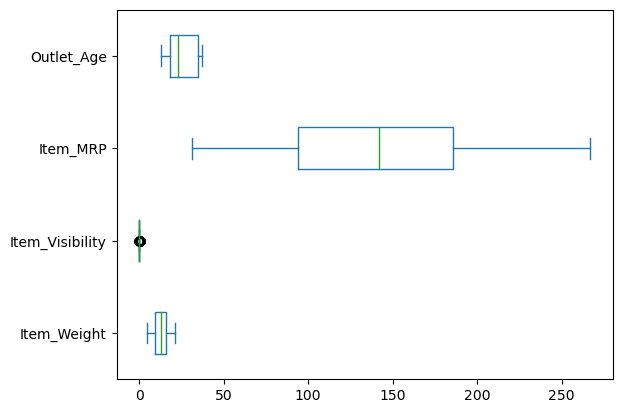

In [218]:
numcols_df.plot(kind='box',vert=False)

<Axes: >

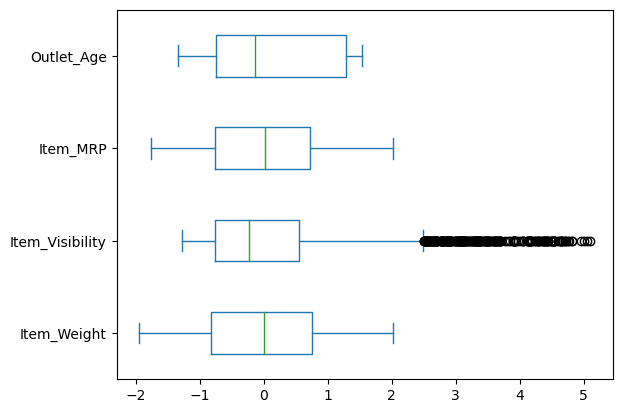

In [219]:
numcols_df_scaled.plot(kind='box',vert=False)

<Axes: >

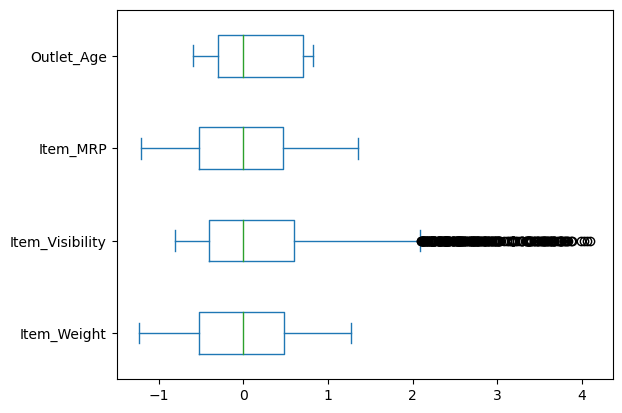

In [220]:
numcols_df_robust.plot(kind='box',vert=False)

<Axes: >

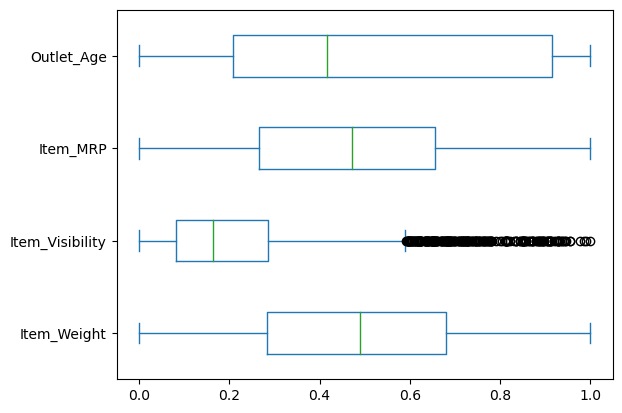

In [221]:
numcols_df_minmax.plot(kind='box',vert=False)

In [222]:
# Dummy Variable Encoding - Encoding Object or String Data
numcols_df['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

In [223]:
# Moving dependent Variable Item_Outlet_Sales from object to numeric
objcols=objcols.drop('Item_Outlet_Sales',axis=1)

In [224]:
from sklearn.preprocessing import LabelEncoder

In [225]:
le=LabelEncoder()

In [226]:
objcols_encode=objcols.apply(le.fit_transform)

In [227]:
objcols_encode.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,156,0,4,9,1,0,1,1
1,8,1,14,3,1,2,2,0
2,662,0,10,9,1,0,1,1
3,1121,1,6,0,2,2,0,1
4,1297,0,9,1,0,2,1,2


In [228]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'],
      dtype='object')

In [229]:
objcols_dummy=pd.get_dummies(objcols,columns=['Item_Fat_Content', 
                                              'Item_Type', 
                                              'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'])

In [230]:
print(objcols.shape)
print(objcols_encode.shape)
print(objcols_dummy.shape)

(14204, 8)
(14204, 8)
(14204, 43)


In [231]:
numcols_df_scaled=numcols_df_scaled.reset_index()

In [232]:
objcols_dummy=objcols_dummy.reset_index()

In [233]:
bigmart_df=pd.concat([numcols_df_scaled,objcols_dummy],axis=1)

In [234]:
numcols_df=numcols_df.reset_index()

In [235]:
bigmart_df['Item_Outlet_Sales']=numcols_df.Item_Outlet_Sales

In [236]:
# Split Data back to train and test
bigmarttrain_df=bigmart_df[bigmart_df.Item_Outlet_Sales!='test']
bigmarttest_df=bigmart_df[bigmart_df.Item_Outlet_Sales=='test']

In [237]:
bigmarttest_df=bigmarttest_df.drop('Item_Outlet_Sales',axis=1)

In [238]:
bigmarttrain_df=bigmarttrain_df.drop('index',axis=1)

In [239]:
bigmarttest_df=bigmarttest_df.drop('index',axis=1)

In [240]:
# Split Data into dependent variable(y) & Independent Variables (X's)
y=bigmarttrain_df.Item_Outlet_Sales
X=bigmarttrain_df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [241]:
bigmarttest_df=bigmarttest_df.drop('Item_Identifier',axis=1)

In [242]:
print(X.shape)
print(bigmarttest_df.shape)

(8523, 46)
(5681, 46)


In [243]:
import seaborn as sns

<Figure size 1000x500 with 0 Axes>

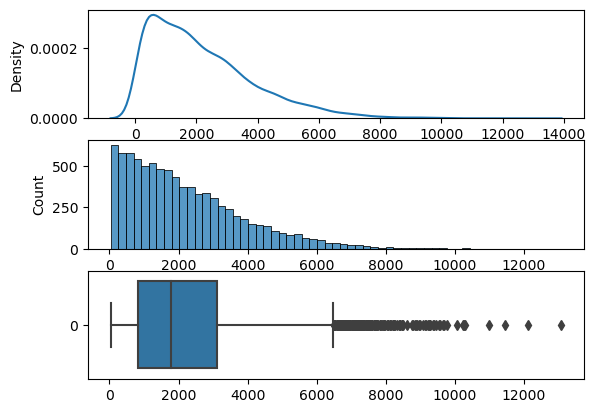

In [244]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.histplot(y,ax=ax[1])
sns.boxplot(y,ax=ax[2],orient='h')
plt.show()

In [245]:
y=y.astype(float)

<Axes: >

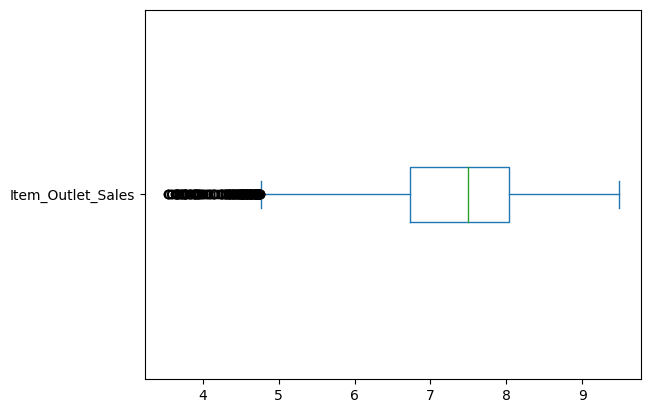

In [246]:
np.log1p(y).plot(kind='box',vert=False)

In [247]:
# For EDA & Hypothesis Testing
trainbigmart=pd.concat([numcols,objcols],axis=1)

In [248]:
trainbigmart['Item_Outlet_Sales']=bigmarttrain_df.Item_Outlet_Sales

In [249]:
trainbigmart=trainbigmart[trainbigmart.Item_Outlet_Sales!='test']

In [250]:
# EDA using trainbigmart

# 1) Pie diagram of Item Fat Content
# 2 ) Pie Diagram of Outlet Size
# 3) Cross Tabulation Outlet Size and Outlet Location & Stacked barplot
# 4) Cross Tabulation of Outlet Size and Outlet Type & Stacked barplot

# groupby()
# Average Item Outlet Sales by Outlet Size
# Average Item Outlet Sales by Outlet Location Type
# Average Item Outlet Sales by Item Code

# Hypothesis test
# Test Null Average Item Outlet Sales of different Outlet Size Equal
# Test Null Average Item Outlet Sales of different Outlet Type Equal
# Test Null No Association between Outlet size and outlet type
# Test Null No Association between outlet size and outlet location type

trainbigmart.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,23,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD,3735.138
1,5.92,0.019278,48.2692,2009,13,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR,443.4228
2,17.50,0.016760,141.6180,1999,23,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD,2097.27
3,19.20,0.000000,182.0950,1998,24,FDX07,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store,FD,732.38
4,8.93,0.000000,53.8614,1987,35,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC,994.7052


In [251]:
# Machine Learning - Training the machines on historical data and build
# predictive models and use those models for predictive purposes.

# Supervised Learning - Complete understaning data interms of variables 
# and also know which models or algorithms to be implemented.

# Unsupervised Learning - No understanding of data as data might not be
# proper structure or hardware failure during collection process lead
# to discrepancies and lack of understanding of data.

# Supervised Learning - 
# Regression Models - Dependent Variable(y) is numeric continuous, closer
# to normal distribution with minimum outliers and no missing values.

# Classification Models - Dependent Variable(y) is Non Numeric and either
# Binary(yes/no) or multinomial (more than 2 levels/classes).

# Regression Models - primary model is Multiple Linear Regression(MLR)

# Multiple Linear Regression explains the linear relationship between a
# dependent variable(y) that is numerical continuos, closer to normal
# distribution and multiple Independent Variables(X's).

# Multiple Linear Regression is an equation that is used for prediction
# purposes.
# y = B0+B1X1+B2X2+B3X3+B4X4+............+BnXn + Et

# y is dependent variable which must be numerical continuos closer to
# normal distribution with minimal outliers and no missing values.
# B0 - intercept or constant - point at which straight line touches y-axis
# B1,B2,B3,B4,...Bn - Coefficients
# X1, X2, X3, X4,..Xn - Independent Variables
# Et - Error term or Residual=ActualValue-PredictedValue

# Algorithm uses matrix formulation to solve for the Intercept+Corfficients
# [Bo,B1,B2,B3,...Bn] = (XT*X)^-1*XT*y
# XT= Transpose of X
# (XT*X)^-1 = Inverse of Matrix
# y = dependent Variable
# X = Independent Variable Matrix

# Assumptions of Multiple Linear Regression
# Pre Model Assumptions
# y must be numerical continuos, closer to normal distribution with
# minimum outliers and no missing values.
# X can be both numerical and non numerical
# There must be a logical linear relationship between dependent variable
# and Independent variables.
# No Multicollinearity - Multicollinearity means very strong correlation
# (>0.95) among variables. If multicollinearity is found do not include
# both variables, choose one among them. Correlation Analysis.
# Exogenity - Dependent Variable is dependent on Independent variables
# but not vice-versa. y is dependent on X's but X's do not depend on y.
# Sample Size required is minimum 20 observations per variable.

# Post Model Assumptions based on residuals
# Residuals must be homoscedastic in nature. Homoscedasticity of residuals
# is residuals must be in a narrow range left to right diagonal Upwards.
# Residuals must be normally distributed and to find this we use
# Q-Q plot. If residuals are all on straight line or closer to straight 
# line

# Statistical Interpretation of Multiple Linear Regression Output
# 1) Adjusted R Square must be in range of 0.60 - 0.95. Adjusted R Square
# explains the amount of variance occuring in the dependent variable
# casused by the model or independent variables.
# Adjusted R Square is sensitive to Independent Variable significance.
# It reduces if independent variable is insignificant and increases only
# if independent variable is significant.
# 2) Model p-value(just below adj R Square) or Significanc F (MS Excel)
# must be less than 0.05.
# Null - Coefficients are Equal to Zero
# Alt - Coefficients are Not Equal to Zero.
# 3) Independent variables p-value must be less than 0.05
# Null - Independent Variable is Insignificant
# Alt - Independent Variable is Significant

# Python Interpretation (Machine Learning based interpretation)
# R Square betweeen 0.60 - 0.95
# Intercept + Coefficients 

# Diagnostics for all Regression Models
# Root Mean Square Error (RMSE) - No Fixed Range and it is a comparitive
# metric and model that has the least RMSE is best fit Model.
# RMSE = SQRT(MEAN(RESIDUAL^2)) # Residual=ActualValue-PredictedValue

In [252]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,-0.824939,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.623224,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.111729,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.513233,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.912325,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [253]:
from sklearn.linear_model import LinearRegression

In [254]:
reg=LinearRegression()

In [255]:
regmodel=reg.fit(X,y)

In [256]:
regmodel.score(X,y) # less than 0.60 - Model is Underfitting

0.5637726588938297

In [257]:
regmodel2=reg.fit(X,np.log(y)) # Logarthmic Transformation of y

In [258]:
regmodel2.score(X,np.log(y)) # Not Underfitting

0.7213162386743487

In [259]:
regmodel2_predict=np.exp(regmodel2.predict(X))

In [260]:
regmodel_predict=regmodel.predict(X)

In [261]:
regmodel2_resid=y-regmodel2_predict

In [262]:
regmodel_resid=y-regmodel_predict

In [263]:
np.sqrt(np.mean(regmodel2_resid**2)) # RMSE with Log Transform

1140.0319667998904

In [264]:
np.sqrt(np.mean(regmodel_resid**2)) # RMSE witout Log Transform

2763.3219994749234

In [265]:
# prediction on test data which did not have dependent variable
reg_test_predict=regmodel2.predict(bigmarttest_df)

In [266]:
reg_test_predict=np.exp(reg_test_predict)

In [267]:
reg_test_predict

array([1435.87722781, 1125.93286853,  598.5626812 , ..., 1488.70822899,
       3546.89596882, 1085.97597198])

In [268]:
pd.DataFrame(reg_test_predict).to_csv("reg.csv")